In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import seaborn as sns

In [ ]:
# Decision boundary plotting function from Matplotlib docs
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


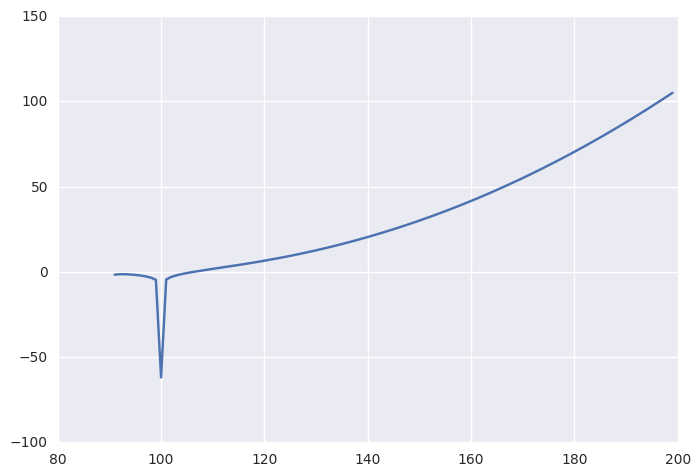

In [160]:
q = np.arange(-10, 10, 0.1)
q1 = np.log(q**3 + q**2)
plt.plot(q1 + q**2)

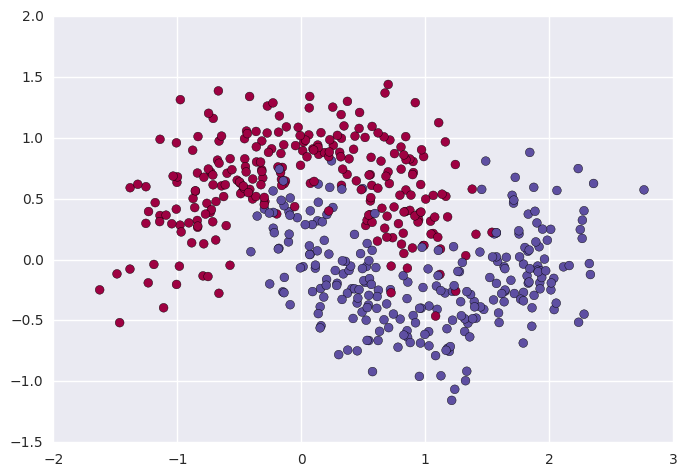

In [147]:
X, y = sklearn.datasets.make_moons(500, noise=0.25)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [124]:
from sklearn.ensemble import RandomForestClassifier

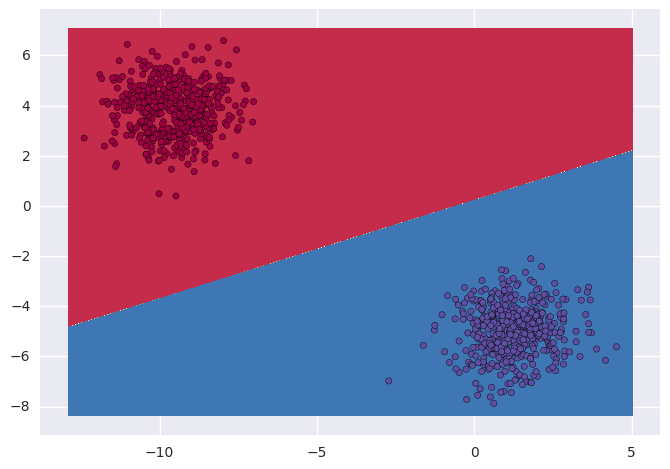

In [125]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)



plot_decision_boundary(lambda x: clf.predict(x))

In [118]:
y.shape

(1000,)

In [44]:
print y[:4]
print p[range(4), y[:4]] - 1

[0 0 0 0]
[-0.9999686  -0.99999942 -0.99999941 -0.99999884]


In [136]:
num_examples = X.shape[0]
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    
    # softmax and posterior probabilities
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # get activation probabilities
    out_probs = probs[range(num_examples), y]
    
    # compute entropy log-loss
    corect_logprobs = -np.log(out_probs)
    
    # compute total error
    data_loss = np.sum(corect_logprobs)
    # data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    # average error
    return 1./num_examples * data_loss


def predict(model, x, get_probs=False):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    if get_probs:
        return probs
    return np.argmax(probs, axis=1)


def build_model(nn_hdim):
    
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim)# / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)# / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

def train_model(model, num_passes=20000, print_loss=True):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        if print_loss and i%100==0:
            print 'Loss at epoch {0}: {1}'.format(i, calculate_loss(model))
    return model

In [148]:
model = build_model(10)
model = train_model(model, num_passes=10000)

Loss at epoch 0: 4.09667120413
Loss at epoch 100: 0.178607925347
Loss at epoch 200: 0.211047577072
Loss at epoch 300: 0.192589060581
Loss at epoch 400: 0.180420026496
Loss at epoch 500: 0.176857497329
Loss at epoch 600: 0.17512024852
Loss at epoch 700: 0.17394117639
Loss at epoch 800: 0.172555839806
Loss at epoch 900: 0.171660621446
Loss at epoch 1000: 0.171022984338
Loss at epoch 1100: 0.170489024379
Loss at epoch 1200: 0.170296487276
Loss at epoch 1300: 0.173145197868
Loss at epoch 1400: 0.172645451604
Loss at epoch 1500: 0.15935935758
Loss at epoch 1600: 0.150866721747
Loss at epoch 1700: 0.147620543169
Loss at epoch 1800: 0.145697113887
Loss at epoch 1900: 0.144250747635
Loss at epoch 2000: 0.143047160793
Loss at epoch 2100: 0.141995487215
Loss at epoch 2200: 0.141036456517
Loss at epoch 2300: 0.14011411529
Loss at epoch 2400: 0.139164243591
Loss at epoch 2500: 0.138064002367
Loss at epoch 2600: 0.136749081172
Loss at epoch 2700: 0.135669041157
Loss at epoch 2800: 0.135041371138
Lo

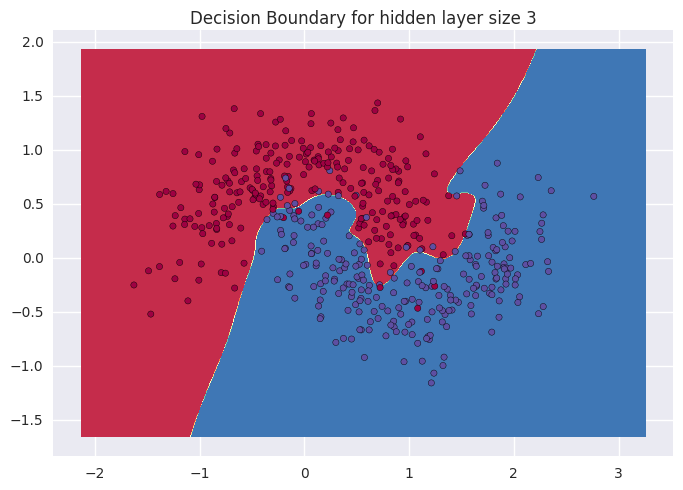

In [149]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()